In [1]:
import numpy as np
from scipy import misc

In [2]:
image = misc.imread('cool_guy_64.png',mode='RGB')

In [3]:
def convert_image_16(image):
    convert = np.ndarray((image.shape[0], image.shape[1]), dtype='u2') 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            red = image[i,j,0]
            green = image[i,j,1]
            blue = image[i,j,2]
            rgb  = (red   >> 3) << 11
            rgb |= (green >> 2) << 5
            rgb |= (blue  >> 3)
            convert[i, j] = rgb
    return convert

In [4]:
image16 = convert_image_16(image)
np.set_printoptions(threshold=np.nan)
print(np.array2string(image16.flatten(), separator=', ', max_line_width=260, formatter={'int': lambda h: "{0:#0{1}x}".format(h,6)}))

[0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0020, 0x1860, 0x30e0, 0x5181, 0x6a01, 0x8262, 0x8aa2, 0x92e2,
 0x92e2, 0x8aa2, 0x7a62, 0x7201, 0x5181, 0x30e1, 0x1860, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000,
 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0840, 0x4121, 0x8241, 0xb342, 0xd422, 0xecc2, 0xfd42, 0xfd82, 0xfda2, 0xfdc2, 0xfdc2,
 0xfdc2, 0xfdc2, 0xfda2, 0xfd82, 0xfd42, 0xecc2, 0xd402, 0xb362, 0x8a61, 0x4121, 0x1040, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x00

In [5]:
def print_c_array(img, varname="image"):
    print("static uint16_t %s[] = {" % varname)
    for i in range(img.shape[0]):
        print("    ", end="")
        for j in range(img.shape[1]):
            print("0x%04x, " % img[i,j], end="")
        print()
    print("};")

print_c_array(image16, "cool_guy_data")

static uint16_t cool_guy_data[] = {
    0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0020, 0x1860, 0x30e0, 0x5181, 0x6a01, 0x8262, 0x8aa2, 0x92e2, 0x92e2, 0x8aa2, 0x7a62, 0x7201, 0x5181, 0x30e1, 0x1860, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 
    0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0840, 0x4121, 0x8241, 0xb342, 0xd422, 0xecc2, 0xfd42, 0xfd82, 0xfda2, 0xfdc2, 0xfdc2, 0xfdc2, 0xfdc2, 0xfda2, 0xfd82, 0xfd42, 0xecc2, 0xd402, 0xb362, 0x8a61, 0x4121, 0x1040, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0000, 0x0

In [6]:
def image_to_header(file):
    from os import path
    name = path.basename(file)
    name = path.splitext(name)[0]
    image = misc.imread(file,mode='RGB')
    im16 = convert_image_16(image)
    print_c_array(im16,name)
    
image_to_header('framed_rainbow_64.png')

static uint16_t framed_rainbow_64[] = {
    0xe71c, 0xf79e, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xef7d, 0xf79e, 0xe71c, 
    0xf79e, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff,

In [7]:
image_to_header('coke_bottle.jpeg')

static uint16_t coke_bottle[] = {
    0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffdf, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffbe, 0xff7e, 0xffbf, 0xff1c, 0xf638, 0xf617, 0xf5f7, 0xfdf6, 0xfe7b, 0xff1e, 0xff7e, 0xff7e, 0xffdf, 0xffff, 0xf7fe, 0xf7fe, 0xf7ff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 
    0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffdf, 0xffdf, 0xd5d7, 0x72aa, 0x69e8, 0x69a6, 0x71c7, 0x71a6, 0x59a8, 0x830d, 0xde19, 0xffdf, 0xffbe, 0xffff, 0xffff, 0xefbd, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xffff, 0xfff

In [8]:
from PIL import Image
img = Image.open('cool_guy_64.png')
img16 = img.convert(mode='I')

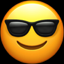

In [9]:
(img)

In [10]:
from PIL import Image, ImageFont, ImageDraw
text = "\U0001f300".encode('utf-32') #CYCLONE emoji
text = "123"
#text = "🙄".encode('utf-8')
image = Image.new("RGBA", (100,100), (255,255,255))
font = ImageFont.truetype("/System/Library/Fonts/Apple Color Emoji.ttc", 96, encoding='unic')
font.getsize(text)
draw = ImageDraw.Draw(image)
draw.text((0,0), text, (0,0,0), font=font)
image.save("Test.png")
image.show()

OSError: invalid size handle

In [13]:
font = ImageFont.truetype("Apple Color Emoji", 96, encoding='unic')


In [14]:
font.getsize("🙄")

OSError: invalid size handle

In [ ]:
help(font)

In [18]:
# Use this script to auto-generate images.
# Adjust settings as needed
# Currently set to create ten images at three different 
# sizes that will have the text 1-10.
import os
import subprocess

def createImage(text, sizePx, outputDir, outputName):
    """ Create square PNG image with white text and transparent background.
    The specified font must already exist on the local computer.
    """
    if not os.path.exists(outputDir):
        os.makedirs(outputDir)
    subprocess.call(["convert",
                     "-size %dx%d"%(sizePx,sizePx),
                     "-background", "#000000",
                     "-gravity", "center",
                     #"-pointsize", "50", # Don't specify so "best size" is used.
                     #"+antialias", # Uncomment to NOT use antialiasing
                     "-fill", "black",
                     "-font", "Apple Color Emoji",
                     "caption:" + text, 
                     outputDir + outputName + ".png"])

createImage("🙄", 64, "./", "eye_roll_64")